In [1]:
cd ../../

/Users/flamholz/Documents/workspace/human_impacts


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
data_file = "data/energy/WRI_global_power_plant_db/source/global_power_plant_database.csv"
power_plant_df = pd.read_csv(data_file)

In [4]:
power_plant_df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,33643.000000,33643.000000,33643.000000,16303.000000,13743.000000,6995.000000,7430.000000,8409.000000,9346.000000,9669.000000,25506.000000
mean,168.992503,32.501448,-4.195501,1995.486227,2016.860001,689.323739,655.356204,756.245838,688.213749,701.996888,724.035121
std,498.471809,22.976195,78.321609,23.525537,1.195205,2330.899731,2229.554684,2518.222075,2390.731668,2402.691580,3771.067583
min,1.000000,-77.847000,-179.977700,1896.000000,2000.000000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,0.000000
25%,5.000000,28.317050,-76.220000,1986.000000,2017.000000,2.166000,2.152000,2.550000,2.591000,3.473000,7.993903
50%,18.300000,39.583500,-1.274400,2005.000000,2017.000000,27.029000,22.832500,25.468000,21.604100,25.282000,35.345934
75%,80.000000,46.470500,61.679450,2012.063866,2017.000000,250.554500,223.171500,280.075000,245.285000,250.124000,222.130958
max,22500.000000,71.292000,179.388700,2018.000000,2018.000000,50834.000000,32320.917000,37433.607000,32377.477000,36448.643000,450562.692350


In [9]:
print("{0:d} power plants in DB".format(power_plant_df.capacity_mw.size))
print("Mean capacity {0:.2g} MW".format(power_plant_df.capacity_mw.mean()))
print("Total capacity {0:.2g} MW".format(power_plant_df.capacity_mw.sum()))
print("Mean 2017 generation {0:.2g} GWh".format(power_plant_df.generation_gwh_2017.mean()))
print("Total 2017 generation {0:.2g} GWh".format(power_plant_df.generation_gwh_2017.sum()))

33643 power plants in DB
Mean capacity 1.7e+02 MW
Total capacity 5.7e+06 MW
Mean 2017 generation 7e+02 GWh
Total 2017 generation 6.8e+06 GWh


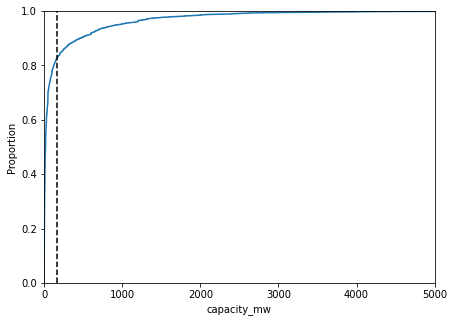

In [6]:
# Plotting the CDF of power plant capacity
plt.figure(figsize=(7,5))
sns.ecdfplot(data=power_plant_df, x='capacity_mw')
plt.axvline(power_plant_df.capacity_mw.mean(), color='k', ls='--')
plt.xlim(0, 5000)
plt.show()

# Sanity check
The WRI database reports on ≈34k power plants making up more than 80% of global installed capacity according to their technical note linked [here](https://pdfs.semanticscholar.org/3859/3d64639f710604add94b63d052456dee4b91.pdf). Since the mean capacity of these 34k plants is roughly 170 MW and the total capacity is ≈6e6 MW = 6 TW, we can multiple by 8760 hrs/yr to get ≈52,000 TWh. This is about 1/4 of global production according to [Our World In Data](https://ourworldindata.org/energy-mix#:~:text=We%20see%20that%20in%202019,and%204.3%25%20came%20from%20nuclear.) which is using BP sourced data. This difference might make sense since we are missing 20% of capacity and because this power plant data does not include enery production/consumption outside power plants, e.g. in cars, planes and trucks. 

If we take the total generation data from the WRI DB as of 2017, we get 7e6 GWh or 7e3 TWh. 

Not positive this all works out. Needs more thought.

In [20]:
# Not all the power plants are emissive! Let's see what fraction of the DB is. 

power_plant_df.primary_fuel.unique()
emissive_sources = ['Gas', 'Oil', 'Coal', 
       'Waste', 'Biomass', 'Petcoke',]
mask = power_plant_df.primary_fuel.isin(emissive_sources)
sub_df = power_plant_df[mask]

In [21]:
print("{0:d} emissive power plants in DB".format(sub_df.capacity_mw.size))
print("Mean emissive capacity {0:.2g} MW".format(sub_df.capacity_mw.mean()))
print("Total emissive capacity {0:.2g} MW".format(sub_df.capacity_mw.sum()))

11098 emissive power plants in DB
Mean emissive capacity 3.4e+02 MW
Total emissive capacity 3.8e+06 MW


In [23]:
print("{0:.2g}".format(1e5*1e5*1e-4*3e7))

3e+13
